# **Introduction**

**Carbon Dioxide (CO<sub>2</sub>)** and **Greenhouse Gas (GHG)** emissions as a result of human activities have been demonstrated to be the primary driver of today's climate change. Supporting evidence of this is the fact that global average temperatures have increased by more than 1 °C since pre-industrual times.

A changing climate has a range of potential ecological, physical, and health impacts, including extreme weather events (such as floods, droughts, storms, and heatwaves); sea-level rise; altered crop growth; and disrupted water systems (*Our World In Data, 2022*).

Therefore, as part of the [2015 Paris Agreement](https://www.un.org/en/climatechange/paris-agreement), most of the countries have started to keep track of their CO<sub>2</sub> and GHG contribution to the atmosphere. This is with the purpose of making decisions that allow the mitigation of each country's carbon footprint and preserve Earth's future biodiversity.

### **Main Objective:** 

The main purpose of this project is to apply data cleaning and pre-processing techniques with Python, and further perform Exploratory Data Analysis on a CO<sub>2</sub> emissions data in order to obtain valuable insights on a significant and pressing worldwide issue.

## **About the dataset**

This dataset was obtained from a public GitHub repository of [Our World In Data](https://github.com/owid/co2-data), a non-governmental organization (NGO) which aims to provide a wide range of insights and relevant information regarding several world problems.

A detailed description of every single feature of the dataset can be read in the "`data/owid-co2-codebook.xlsx`" file.

## **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import urllib.request

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

# Magic function to display matplotlib figures in a jupyter notebook
%matplotlib inline

# Making plots pretty!
sns.set_style("darkgrid")

## **Saving and reading the data locally**

In [ ]:
# Data set url
owid_co2_data_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
owid_co2_codebook_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-codebook.csv"

In [ ]:
# Downloading data from url into ./data/ directory
urllib.request.urlretrieve(
    url = owid_co2_data_url,
    filename = "./data/owid-co2-data.csv"
)

In [ ]:
# Downloading codebook from url into ./data/ directory
urllib.request.urlretrieve(
    url = owid_co2_codebook_url,
    filename = "./data/owid-co2-codebook.csv"
)

In [ ]:
# Converting codebook csv file into excel file and saving it into ./data/ directory
codebook_df = pd.read_csv("./data/owid-co2-codebook.csv")
codebook_excel = pd.ExcelWriter("./data/owid-co2-codebook.xlsx")
codebook_df.to_excel(codebook_excel, index=False)
codebook_excel.save()

In [2]:
# To specify the number of rows and columns to be displayed by pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
# Reading and visualizing the first 5 rows of the CO2 data set
missing_values = [0, -0.000]
data = pd.read_csv("./data/owid-co2-data.csv", na_values = missing_values)

data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.931,0.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.968,0.787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.968,0.784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.004,0.789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.004,0.785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117,NaN,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 12872 non-null  float64
 6   cement_co2_per_capita                      12570 non-null  float64
 7   co2                                        26592 non-null  float64
 8   co2_growth_abs                             23330 non-null  float64
 9   co2_growth_prct                            23541 non-null  float64
 10  co2_including_luc     

In [5]:
data.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,46523.000000,3.857400e+04,1.455100e+04,12872.000000,12570.000000,26592.000000,23330.000000,23541.000000,23877.000000,22778.000000,22872.000000,23519.000000,15697.000000,9523.000000,24116.000000,15947.000000,10053.000000,17947.000000,17308.000000,4599.000000,4226.000000,3897.000000,13178.000000,2.488500e+04,2.400200e+04,19535.000000,5638.000000,9779.000000,36613.000000,21503.000000,2354.000000,9922.000000,7159.000000,4928.000000,4834.000000,9255.000000,8986.000000,6119.000000,6114.000000,34819.000000,33485.000000,6055.000000,6025.000000,5861.000000,5831.000000,21288.000000,20799.000000,2339.000000,2336.000000,10020.000000,12866.000000,23086.000000,23086.000000,16673.000000,13107.000000,21574.000000,22666.000000,16294.000000,5437.000000,9051.00000,34513.000000,20065.000000,2307.000000,4911.000000,9074.000000,34819.000000,20543.000000,2325.000000,6144.000000,6149.000000,4155.000000,4146.000000
mean,1925.686478,6.005374e+07,2.679977e+11,16.271050,0.115559,447.963542,7.088698,21.787973,505.910735,7.557008,12.729963,7.554607,2.280997,1.087295,4.094064,0.427262,0.238605,215.666037,1.546153,1318.443316,6.383620,0.361727,377.739057,1.278074e+04,2.520675e+04,9831.686767,437.269240,3081.446691,9445.479786,4069.312842,385.488772,25947.817003,1.809828,17.374686,0.780854,134.714757,1.430906,6.811790,7.545379,124.280845,4.410220,147.939751,1.864528,55.820964,0.595095,130.841446,2.582495,0.073956,18.824530,2382.598352,5.336111,6.352489,3.664420,8.856316,5.286734,6.962012,3.617344,9.299498,5.716941,6.70474,3.028992,3.901383,21.118247,6.610429,6.841638,2.893488,3.791297,21.216723,772.113004,748.578502,-8.918299,21.016147
std,61.042693,3.280828e+08,2.104075e+12,87.039552,0.146242,1946.443273,65.381730,721.375675,2093.249238,94.765334,723.347491,17.302114,5.957618,4.848752,15.736092,0.562252,0.252507,880.623366,2.513516,3789.594491,6.735405,0.262976,1920.334781,7.029136e+04,1.117610e+05,42952.451275,1322.133886,13801.182706,40662.844380,24694.709332,985.088179,36787.851922,1.780206,42.471425,5.131375,496.061827,3.587808,7.152223,8.013412,474.339427,9.059228,655.768041,2.554765,236.738035,0.734658,674.925428,16.113109,0.056409,42.241664,10832.934468,17.583154,20.170841,11.779739,23.491615,17.297605,21.680182,11.813029,24.718074,14.607828,21.33410,10.489675,13.952166,34.420280,15.190158,20.642362,10.685032,13.591654,34.601002,3554.802762,3488.004825,272.556784,54.351875
min,1750.000000,2.100000e+01,4.998000e+07,0.001000,0.001000,0.001000,-1818.472000,-100.000000,-18

Some data sets can have column names with different formats, such as upper cases, lower cases, spaces, symbols, etc. In this case, the column names have already been standardized, so there's no need to do that.

In [6]:
# Checking which features are different than float type
data.dtypes[data.dtypes != "float64"]

country     object
year         int64
iso_code    object
dtype: object

All the columns are float type objects except **`'country'`**, **`'year'`** and **`'iso_code'`** which are differents.

## **Using Pandas API extension for EDA**

### **Missing values analysis**

In [7]:
co2_df = data.copy(deep = True)

In [8]:
%run pd-extensions.ipynb

In [9]:
# Total number of missing values in the dataset
total_missing = co2_df.explore.number_missing()
print(f"There are {total_missing} missing values in the dataset.")

There are 2264752 missing values in the dataset.


In [10]:
# Summary table of missing values per variable
co2_df.explore.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,country,0,46523,0.00
1,year,0,46523,0.00
2,iso_code,6661,46523,14.32
3,population,7949,46523,17.09
4,gdp,31972,46523,68.72
5,cement_co2,33651,46523,72.33
6,cement_co2_per_capita,33953,46523,72.98
7,co2,19931,46523,42.84
8,co2_growth_abs,23193,46523,49.85
9,co2_growth_prct,22982,46523,49.40


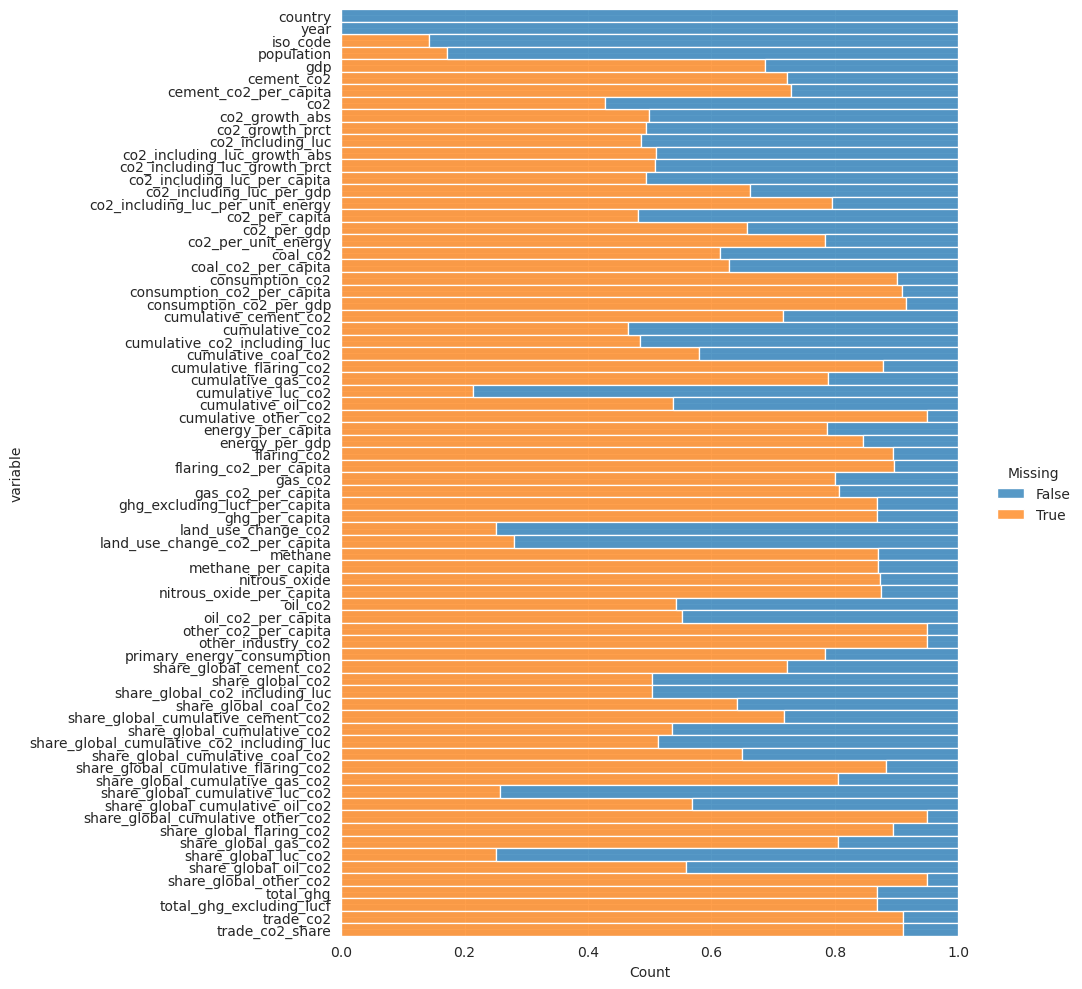

In [11]:
# Visualizing the proportion of missing values per variable
co2_df.explore.missing_variable_plot()

<AxesSubplot:>

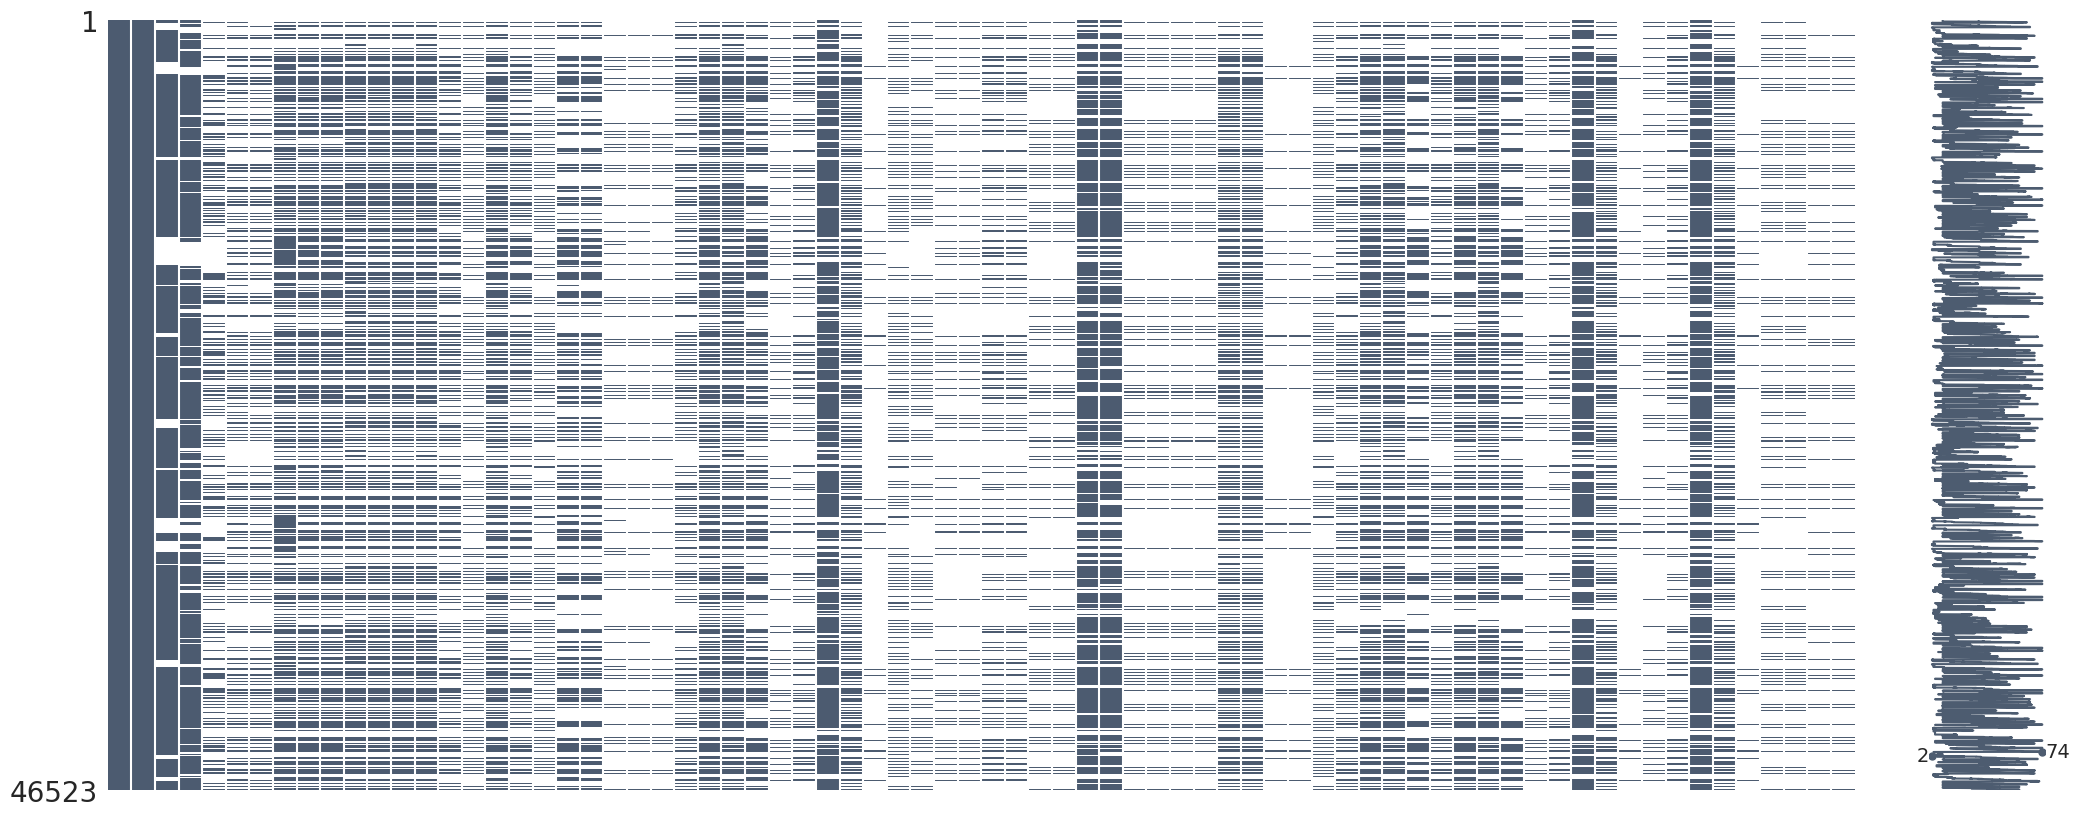

In [12]:
msno.matrix(co2_df, color = (0.3, 0.36, 0.44))

There are many columns practically empty. Hence, for the purposes of this project, some of those columns will be manually deleted since they are not too relevant don't provide much information.

# **Data Pre-processing**

As a standardized unit of measurement, CO<sub>2</sub> emissions are technically called '**emissions of equivalent CO<sub>2</sub>**'. This is because the measurement not only accounts for the emissions of Carbon Dioxide gas alone, but also for gases such as **Methane (CH<sub>4</sub>)**, **Nitrous Oxide (N<sub>2</sub>O)**, **Sulphur hexafluoride (SF<sub>6</sub>)**, and several others. Since the scope of this project will not include an analysis of each type of gas, and being that there is not a significant amount of data for them in the dataset, these columns will be deleted too.

The original dataset is being kept unmodified for future analysis that include all these variables nonetheless.

In [13]:
columns_to_delete = [
    'co2_including_luc_growth_abs',
    'co2_including_luc_growth_prct',
    'co2_including_luc_per_capita',
    'co2_including_luc_per_gdp',
    'co2_including_luc_per_unit_energy',
    'consumption_co2',
    'consumption_co2_per_capita',
    'consumption_co2_per_gdp',
    'cumulative_co2_including_luc',
    'cumulative_luc_co2',
    'flaring_co2',
    'flaring_co2_per_capita',
    'ghg_excluding_lucf_per_capita',
    'ghg_per_capita',
    'methane',
    'methane_per_capita',
    'nitrous_oxide',
    'nitrous_oxide_per_capita',
    'share_global_co2_including_luc',
    'share_global_cumulative_cement_co2',
    'share_global_cumulative_co2',
    'share_global_cumulative_co2_including_luc',
    'share_global_cumulative_coal_co2',
    'share_global_cumulative_gas_co2',
    'share_global_cumulative_flaring_co2',
    'share_global_cumulative_luc_co2',
    'share_global_cumulative_other_co2',
    'share_global_cumulative_oil_co2',
    'share_global_luc_co2',
    'total_ghg',
    'total_ghg_excluding_lucf',
    'trade_co2',
    'trade_co2_share'
]

co2_df.drop(
    columns = columns_to_delete,
    axis = 1,
    inplace = True
)

### **Year column**

In [14]:
# Checking minimum and maximum year
print("min year:", co2_df["year"].min())
print("max year:", co2_df["year"].max())

min year: 1750
max year: 2021


In [15]:
np.sort(co2_df["year"].unique())

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

As observed, the years have been registered consecutively (year-by-year). Also, the data dates back since the mid-18th century, which is the beginning of the industrialized modern era.

In [16]:
# Checking missing values in the year column
years_missing = co2_df["year"].isnull().sum()
print(f"There are {years_missing} missing values in the year column.")

There are 0 missing values in the year column.


### **ISO code column**

In [17]:
# Checking missing values in the ISO code column
iso_codes_missing = co2_df["iso_code"].isnull().sum()
print(f"There are {iso_codes_missing} missing values in the iso_code column.")

There are 6661 missing values in the iso_code column.


In [18]:
# Checking countries without an ISO code
co2_df[co2_df["iso_code"].isnull()]["country"].unique()

array(['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Central America (GCP)', 'Europe',
       'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (27) (GCP)',
       'European Union (28)', 'French Equatorial Africa (GCP)',
       'French West Africa (GCP)', 'High-income countries',
       'International transport', 'Kosovo', 'Kuwaiti Oil Fires (GCP)',
       'Leeward Islands (GCP)', 'Low-income countries',
       'Lower-middle-income countries', 'Middle East (GCP)',
       'Non-OECD (GCP)', 'North America', 'North America (GCP)',
       'North America (excl. USA)', 'OECD (GCP)', 'Oceania',
       'Oceania (GCP)', 'Panama Canal Zone (GCP)', 'Ryukyu Islands (GCP)',
       'South America', 'South America (GCP)',
       'St. Kitts-Nevis-Anguilla (GCP)', 'Upper-middle-income countries',
       'World'], dtype=object)

In [19]:
non_iso_code_countries = [
    'Africa (GCP)',
    'Asia (GCP)',
    'Central America (GCP)',
    'Europe (GCP)',
    'Europe (excl. EU-27)',
    'Europe (excl. EU-28)',
    'European Union (27)',
    'European Union (27) (GCP)',
    'European Union (28)',
    'French Equatorial Africa (GCP)',
    'French West Africa (GCP)',
    'International transport',
    'Kosovo',
    'Kuwaiti Oil Fires (GCP)',
    'Leeward Islands (GCP)',
    'Middle East (GCP)',
    'Non-OECD (GCP)',
    'North America (GCP)',
    'OECD (GCP)',
    'Oceania (GCP)',
    'Panama Canal Zone (GCP)',
    'Ryukyu Islands (GCP)',
    'St. Kitts-Nevis-Anguilla (GCP)',
]

For the sake of simplification, the data of these countries won't be taken into consideration due to their relatively small contribution to global CO<sub>2</sub> emissions. Additionally, the data of '**European Union (27)**', '**European Union (28)**', and those countries/continents with the **(GCP)** suffix will also be deleted since their data has already been recorded in the countries/continents with no such suffix.

In [20]:
print(co2_df[co2_df["country"] == "Africa"][["country", "year", "co2"]].tail(3))
print("\n", co2_df[co2_df["country"] == "Africa (GCP)"][["country", "year", "co2"]].tail(3))

    country  year       co2
441  Africa  2019  1467.492
442  Africa  2020  1385.889
443  Africa  2021  1450.796

           country  year       co2
613  Africa (GCP)  2019  1467.477
614  Africa (GCP)  2020  1385.877
615  Africa (GCP)  2021  1450.782


In [21]:
# Dropping the countries
for country in non_iso_code_countries:
    value = co2_df[
        co2_df["country"] == country
    ].index
    
    co2_df.drop(
        labels = value,
        axis = 0,
        inplace = True
    )

In [22]:
# Checking missing values in the ISO code column
iso_codes_missing = co2_df["iso_code"].isnull().sum()
print(f"There are {iso_codes_missing} missing values in the iso_code column.")

There are 3708 missing values in the iso_code column.


### **CO<sub>2</sub> Emissions column**

In [23]:
# Checking missing values in the co2 column
co2_missing = co2_df["co2"].isnull().sum()
print(f"There are {co2_missing} missing values in the co2 column.")

There are 19721 missing values in the co2 column.


In [24]:
# Creating a df with a percentage of missing values in the co2 column per country
temp_df = co2_df[["country", "year", "co2"]]

pct_missing_per_country_df = (
    temp_df
    .groupby("country")
    .count()
    .reset_index()
    .rename(columns={"year": "total_entries", "co2": "not_nans"})
    .assign(
        nans = lambda x: x["total_entries"] - x["not_nans"],
        pct_missing = lambda x: np.round(100 - (x["not_nans"] / x["total_entries"]) * 100, 2)
    )
)

print(pct_missing_per_country_df.head(10))
print("\nTotal countries with CO2 NaN's: ", len(pct_missing_per_country_df))

          country  total_entries  not_nans  nans  pct_missing
0     Afghanistan            172        73    99        57.56
1          Africa            272       138   134        49.26
2   Aland Islands            172         0   172       100.00
3         Albania            172        89    83        48.26
4         Algeria            172       106    66        38.37
5  American Samoa            172         0   172       100.00
6         Andorra            272        32   240        88.24
7          Angola            172        72   100        58.14
8        Anguilla            172        32   140        81.40
9      Antarctica             21        21     0         0.00

Total countries with CO2 NaN's:  246


In [25]:
# Filtering countries with more than 80% of CO2 missing entries
countries_to_delete = pct_missing_per_country_df[
    pct_missing_per_country_df["pct_missing"] > 80
]["country"].values

countries_to_delete

array(['Aland Islands', 'American Samoa', 'Andorra', 'Anguilla',
       'Eritrea', 'Falkland Islands', 'Guernsey', 'Isle of Man', 'Jersey',
       'Lesotho', 'Mayotte', 'Namibia', 'Netherlands Antilles',
       'Palestine', 'Puerto Rico', 'Saint Martin (French part)',
       'Svalbard and Jan Mayen', 'Timor', 'Turks and Caicos Islands',
       'Tuvalu', 'United States Virgin Islands', 'Western Sahara'],
      dtype=object)

In [26]:
# Deleting these countries from the dataset
for country in countries_to_delete:
    value = co2_df[
        co2_df["country"] == country
    ].index
    
    co2_df.drop(
        labels = value,
        axis = 0,
        inplace = True
    )

In [27]:
# Checking missing values in the co2 column
co2_missing = co2_df["co2"].isnull().sum()
print(f"There are {co2_missing} missing values in the co2 column.")

There are 15947 missing values in the co2 column.


## **Cleaning data by rows**

In [28]:
# Total number of missing values in the dataset
total_missing = co2_df.explore.number_missing()
print(f"There are {total_missing} missing values in the dataset.")

There are 928622 missing values in the dataset.


In [29]:
# Using a threshold of 8, which means all rows that have at least 8 non-NaN values will be kept.
co2_df.dropna(thresh=8, axis = 0, inplace = True)

In [30]:
# Total number of missing values in the dataset
total_missing = co2_df.explore.number_missing()
print(f"There are {total_missing} missing values in the dataset.")

There are 358418 missing values in the dataset.


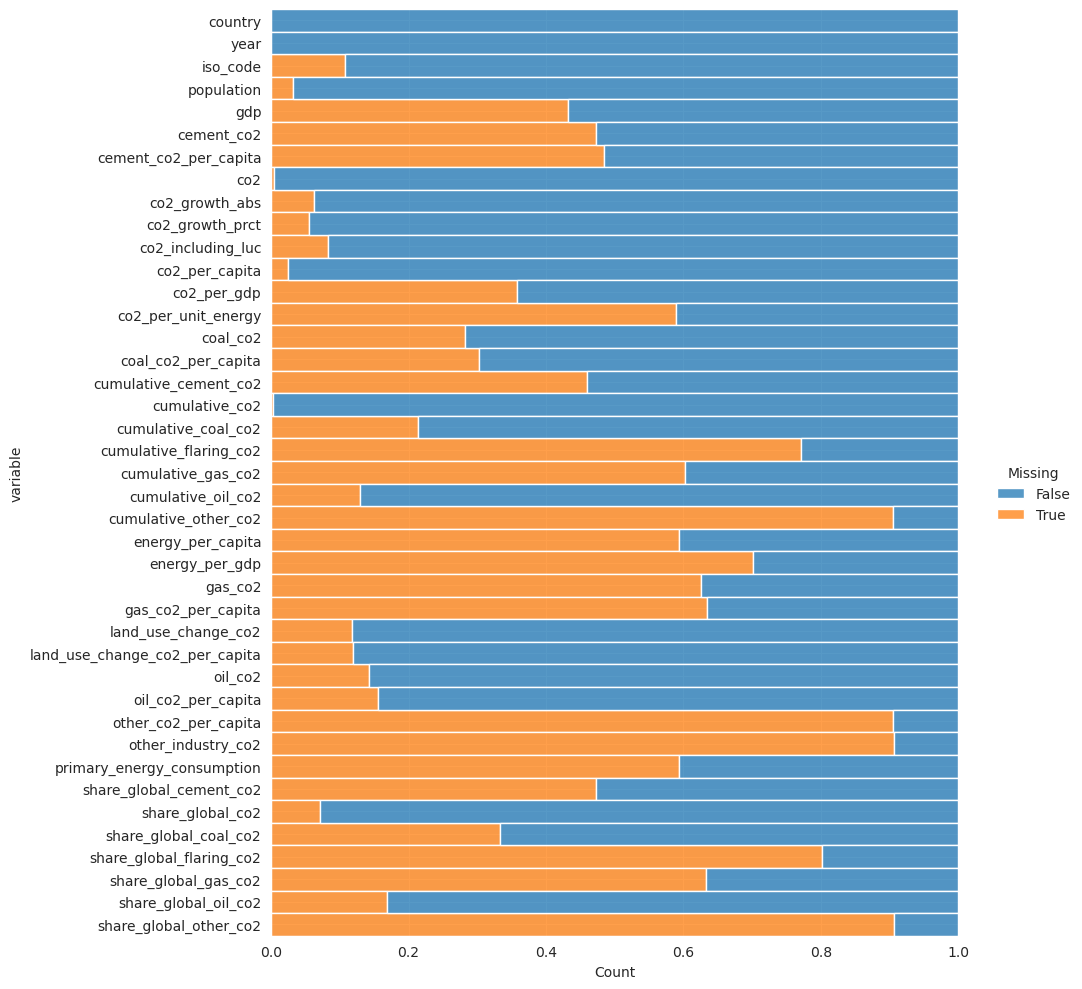

In [31]:
# Visualizing the proportion of missing values per variable
co2_df.explore.missing_variable_plot()

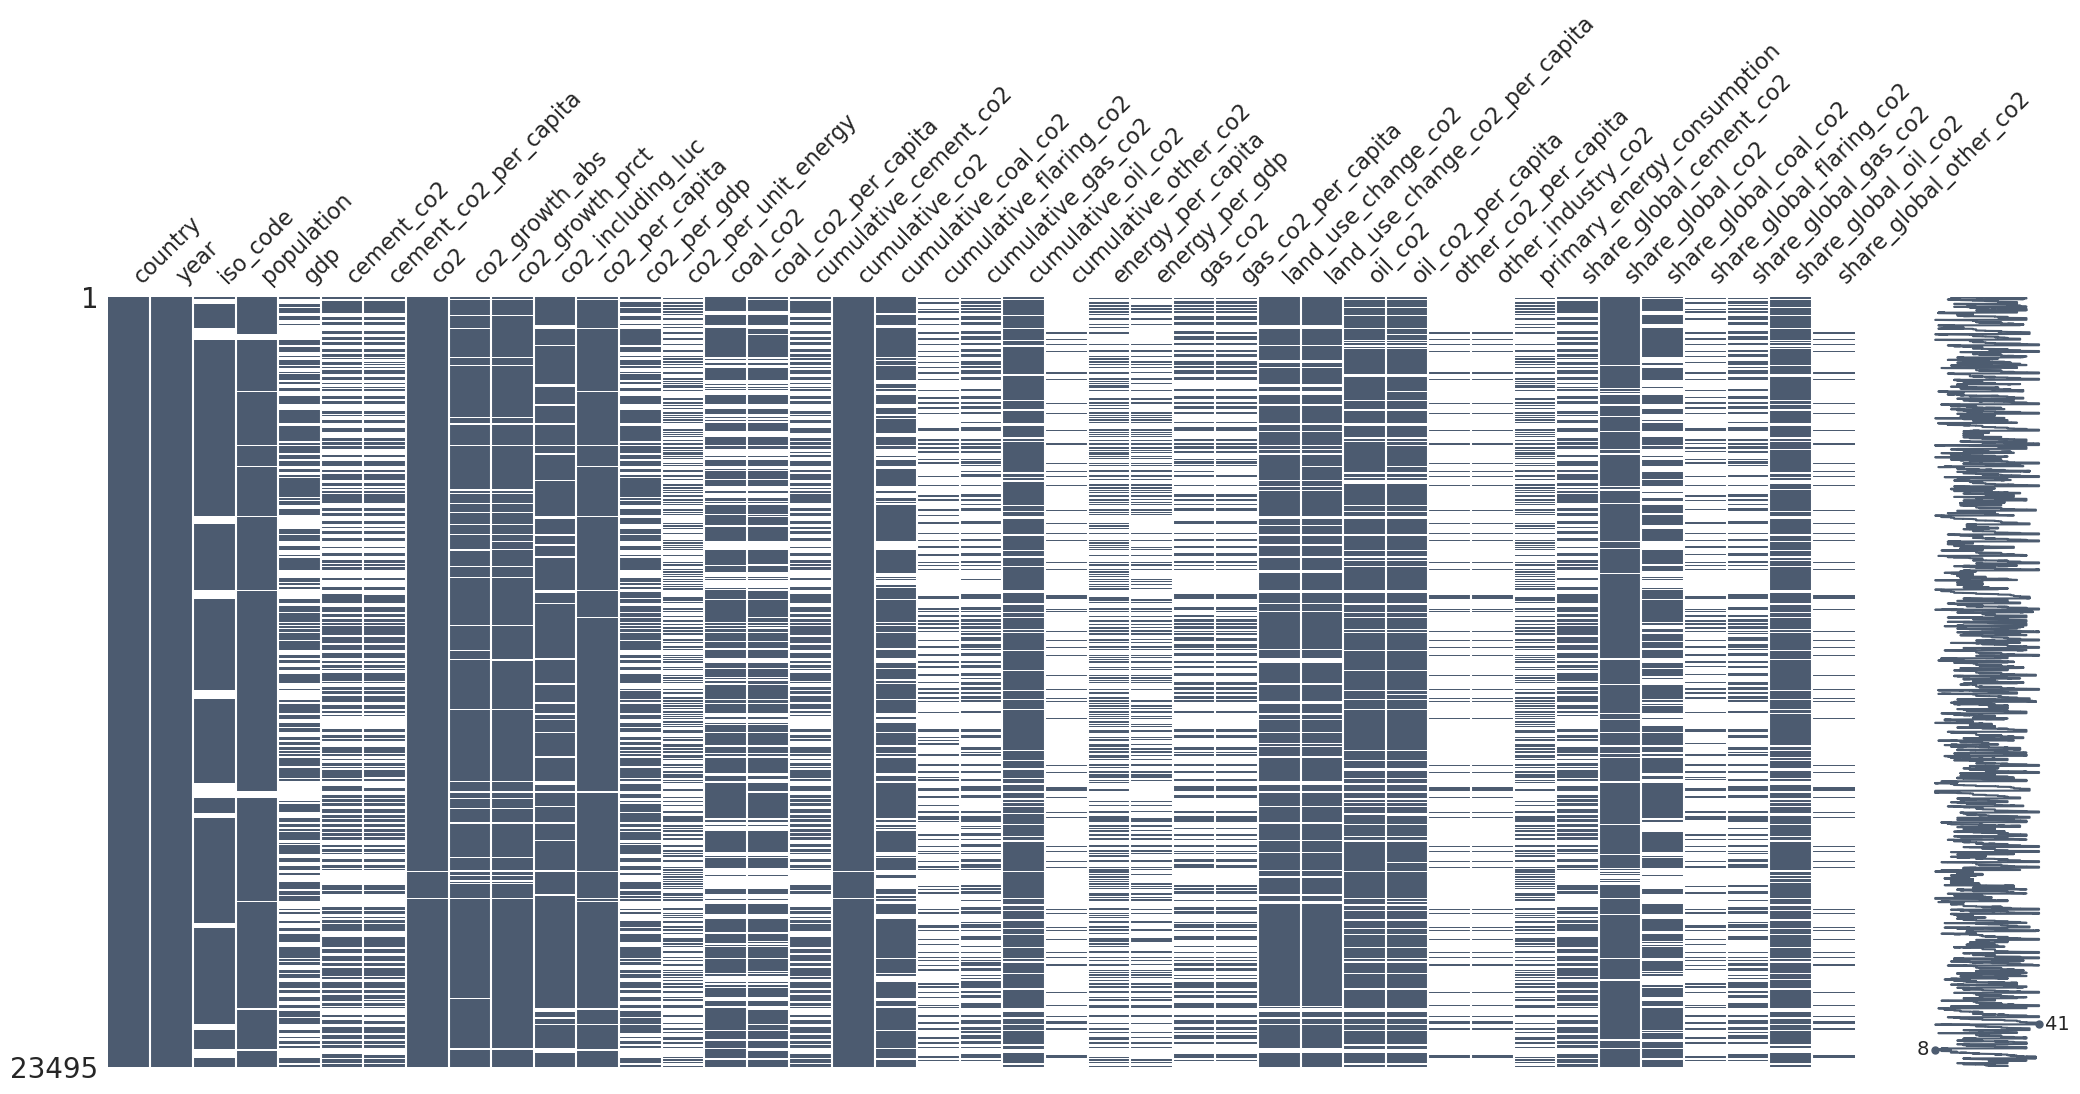

In [32]:
co2_df.explore.missing_variable_plot_matrix()

Now the dataset has a lot less missing values and, regardless of the fact that there are still some missing values, these won't cause much trouble for making plots and performing analysis.

However, it is important to keep in mind that, if it comes to training Machine Learning models, imputation and further processing methods might be needed.

In [33]:
# Resetting df indexes
co2_df = co2_df.reset_index(drop = True)
co2_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,cumulative_cement_co2,cumulative_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,gas_co2,gas_co2_per_capita,land_use_change_co2,land_use_change_co2_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,8.039,0.002,NaN,NaN,0.015,0.002,NaN,0.015,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.024,1.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7480464.0,9.421400e+09,NaN,NaN,0.084,0.070,475.000,8.585,0.011,0.009,NaN,0.021,0.003,NaN,0.099,0.036,NaN,NaN,0.063,NaN,NaN,NaN,NaN,NaN,8.500,1.136,0.063,0.008,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,0.004,NaN
2,Afghanistan,1951,AFG,7571542.0,9.692280e+09,NaN,NaN,0.092,0.007,8.696,9.142,0.012,0.009,NaN,0.026,0.003,NaN,0.191,0.061,NaN,NaN,0.129,NaN,NaN,NaN,NaN,NaN,9.050,1.195,0.066,0.009,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,0.004,NaN
3,Afghanistan,1952,AFG,7667534.0,1.001733e+10,NaN,NaN,0.092,NaN,NaN,9.948,0.012,0.009,NaN,0.032,0.004,NaN,0.282,0.093,NaN,NaN,0.189,NaN,NaN,NaN,NaN,NaN,9.856,1.285,0.060,0.008,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,0.003,NaN
4,Afghanistan,1953,AFG,7764549.0,1.063052e+10,NaN,NaN,0.106,0.015,16.000,10.915,0.014,0.010,NaN,0.038,0.005,NaN,0.388,0.131,NaN,NaN,0.257,NaN,NaN,NaN,NaN,NaN,10.809,1.392,0.068,0.009,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,0.003,NaN


# **Saving the processed data**

In [ ]:
co2_df.to_csv("./data/processed_co2.csv")

# **References**

- Ritchie, H. Roser, M. Rosado, P. (2023). CO<sub>2</sub> and Greenhouse Gas Emissions. Our World In Data. https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions   